In [25]:
import networkx as nx
import random
import csv
import numpy as np
import matplotlib.pyplot as plt

# Initialize the graph from CSV files (same as in the previous ones, so remember to replace)
def initialize_graph():
    G = nx.DiGraph()
    
    with open('../Graph/nodes.csv', 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_node(row['Id'], label=row['Label'])

    with open('../Graph/edges.csv', 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_edge(row['Source'], row['Target'], weight=int(row['Weight']))
    return G

# Initialize node states
def initialize_node_states(G, initial_adopted_nodes):
    for node in G.nodes:
        G.nodes[node]['adopted'] = node in initial_adopted_nodes

# Bass contagion model
def bass_contagion_model(G, s, q, num_iterations):
    adoption_history = []
    for _ in range(num_iterations):
        adoption_changes = {}
        for node in G.nodes:
            if not G.nodes[node]['adopted']:
                external_influence = s
                neighbor_influence = sum(G.nodes[neighbor]['adopted'] for neighbor in G.neighbors(node)) * q
                adoption_probability = 1 - (1 - external_influence) * (1 - neighbor_influence)
                adoption_changes[node] = random.random() < adoption_probability

        # Update node states based on calculated changes
        for node, will_adopt in adoption_changes.items():
            if will_adopt:
                G.nodes[node]['adopted'] = True

        # Record current state
        current_state = {node: G.nodes[node]['adopted'] for node in G.nodes}
        adoption_history.append(current_state)

    return adoption_history

# Visualization function
def visualize_evolution(G, adoption_history):
    pos = nx.spring_layout(G) 
    labels = nx.get_node_attributes(G, 'label')

    for iteration, state in enumerate(adoption_history):
        plt.figure(figsize=(12, 8))
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        
        for node, adopted in state.items():
            node_color = 'green' if adopted else 'red'
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_color)
            nx.draw_networkx_labels(G, pos, labels={node: labels[node]}, font_size=8)

        plt.title(f'Iteration {iteration + 1}')
        plt.show()

# Main execution
G = initialize_graph()


### Scenario 1: Specific Initial Nodes (Rose and Jack)

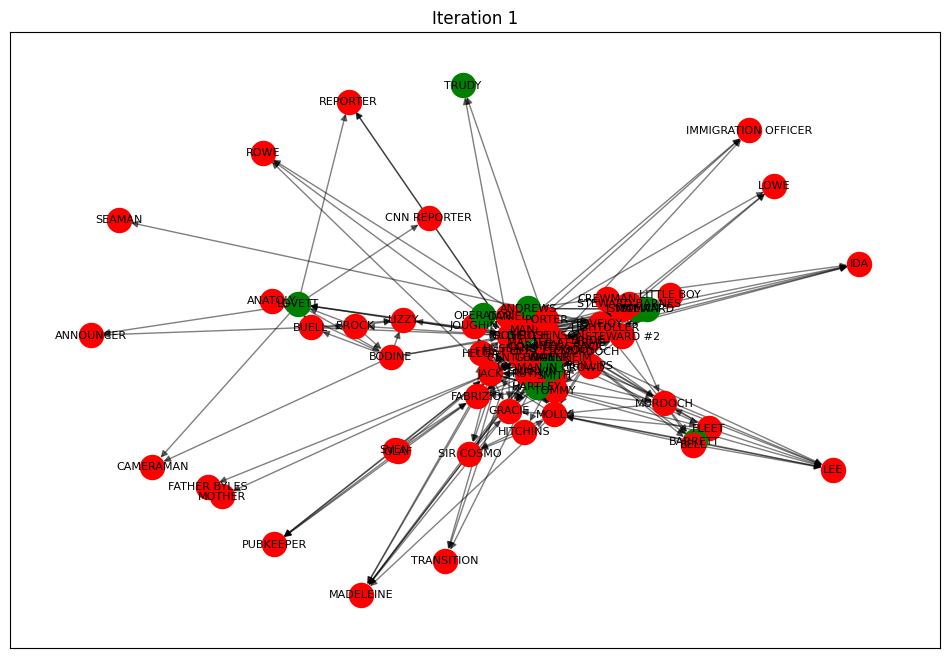

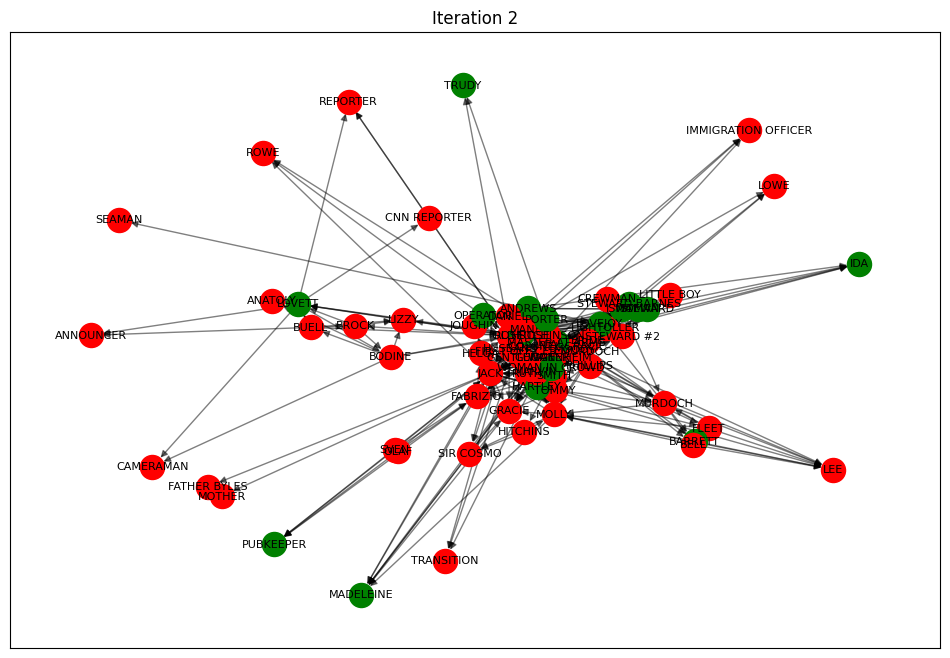

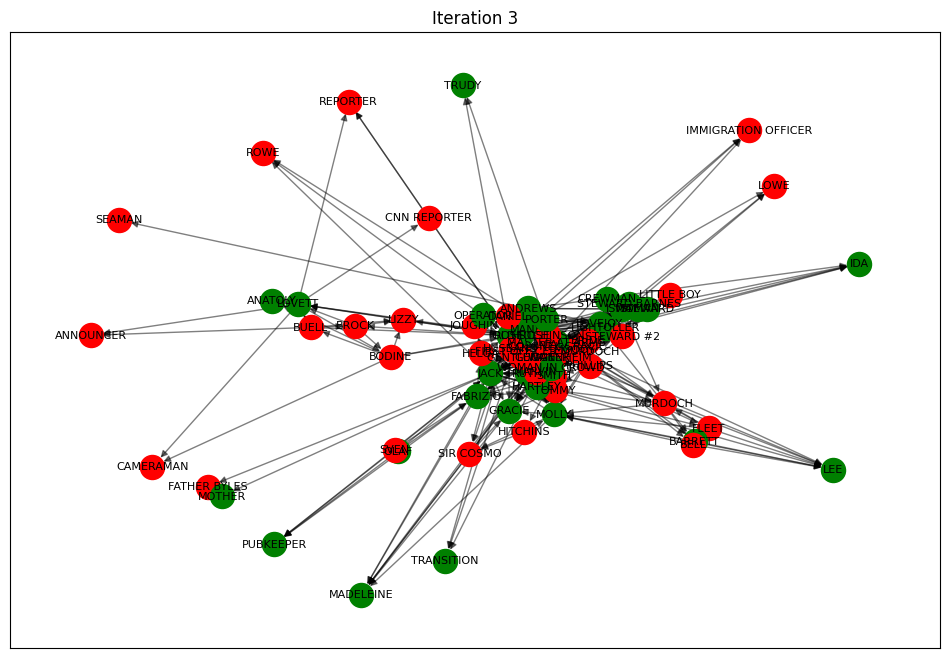

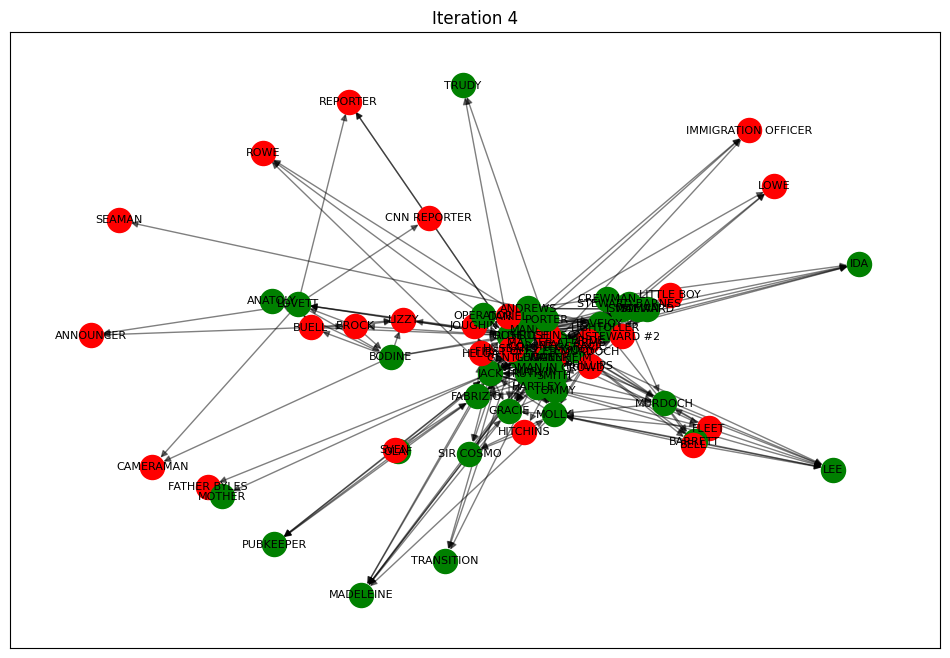

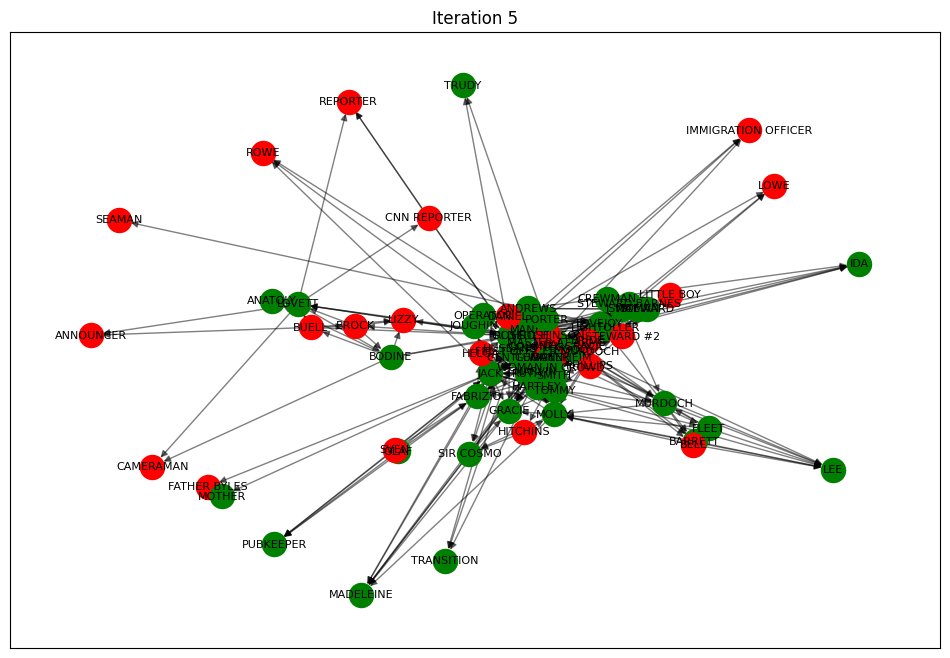

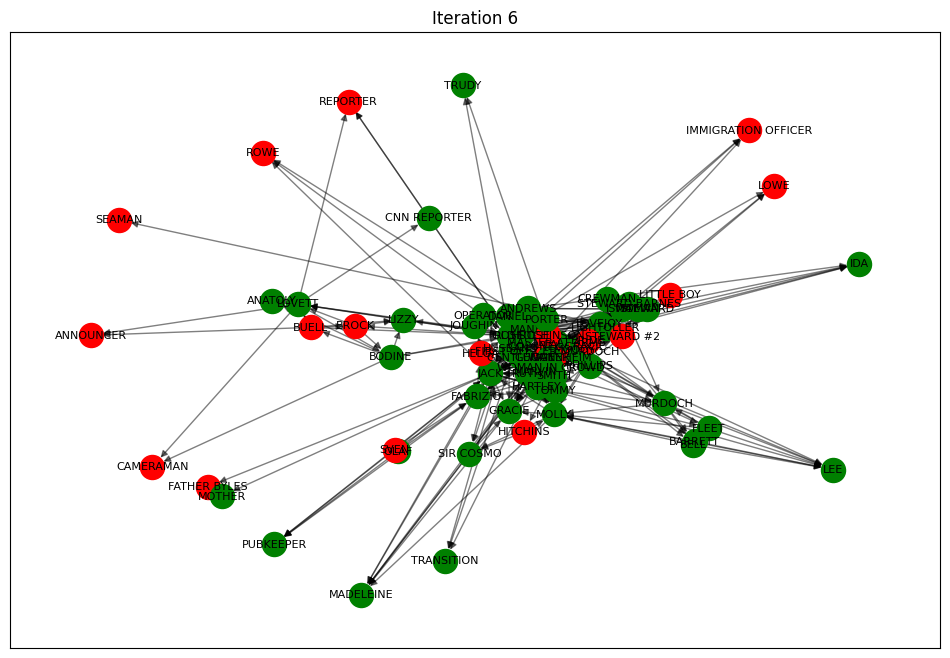

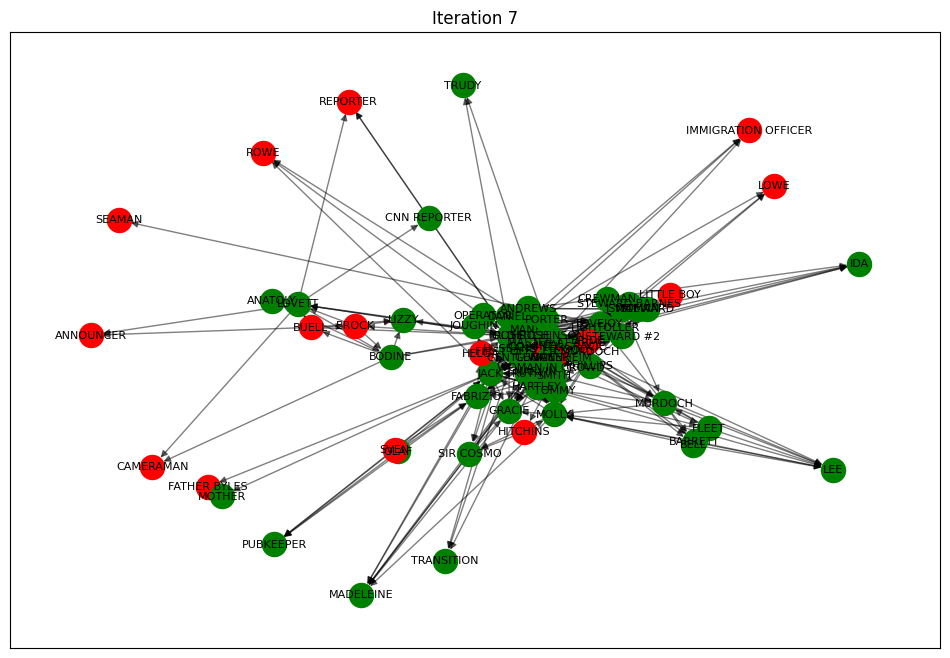

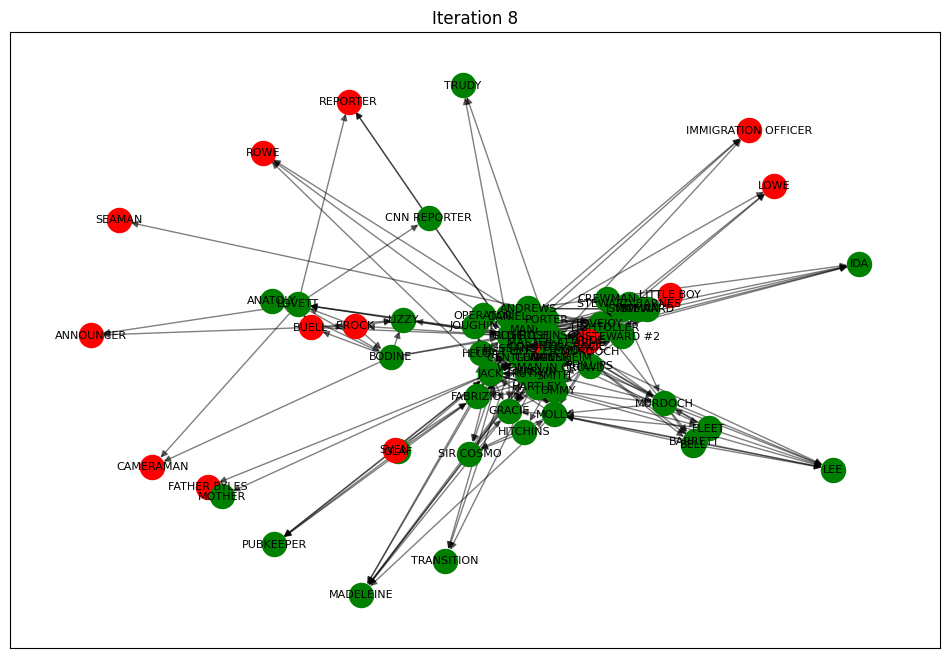

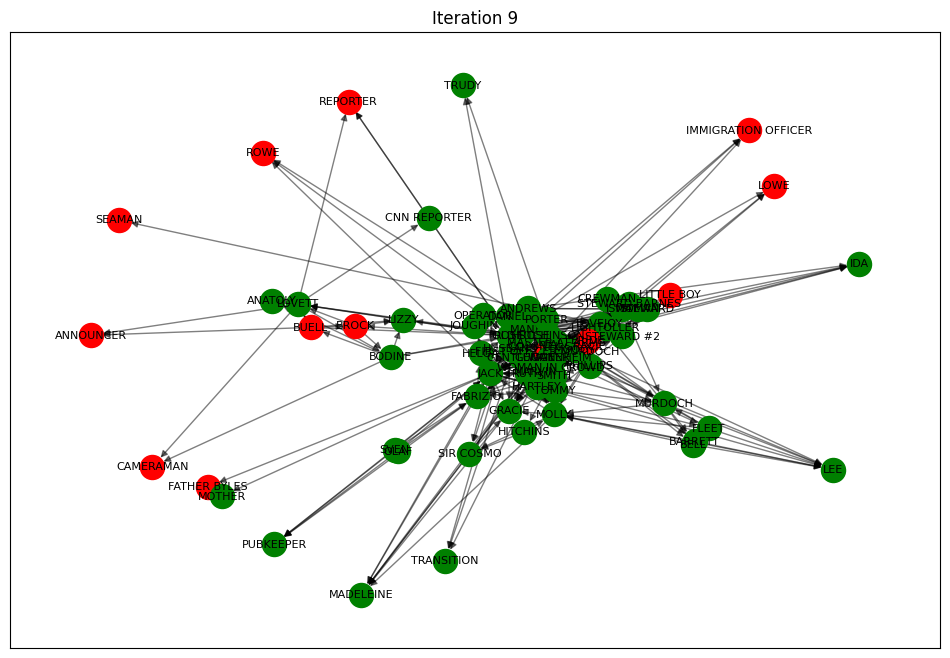

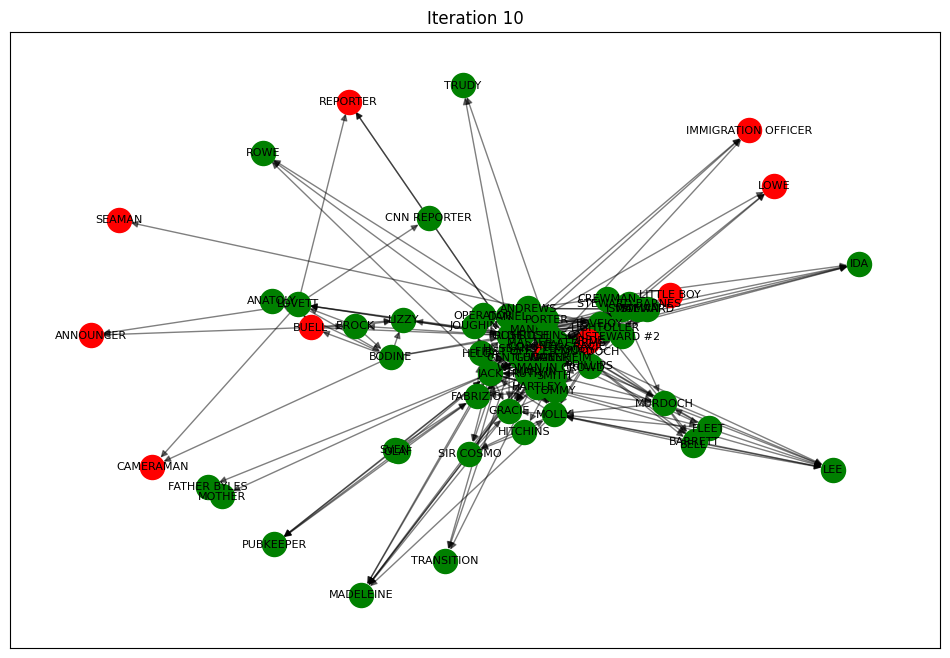

In [26]:
s = 0.05  # External influence
q = 0.1   # Neighbor influence
num_iterations = 10

# Initialize with specific nodes (Rose and Jack)
initialize_node_states(G, ['Rose', 'Jack'])
adoption_history = bass_contagion_model(G, s, q, num_iterations)

# Visualize only the last iteration
visualize_evolution(G, adoption_history)


### Scenario 2: Random Initialization

C:\Users\azzil\AppData\Local\Temp\ipykernel_26560\2357423290.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_initial_nodes = random.sample(G.nodes(), 5)  # Adjust the number as needed


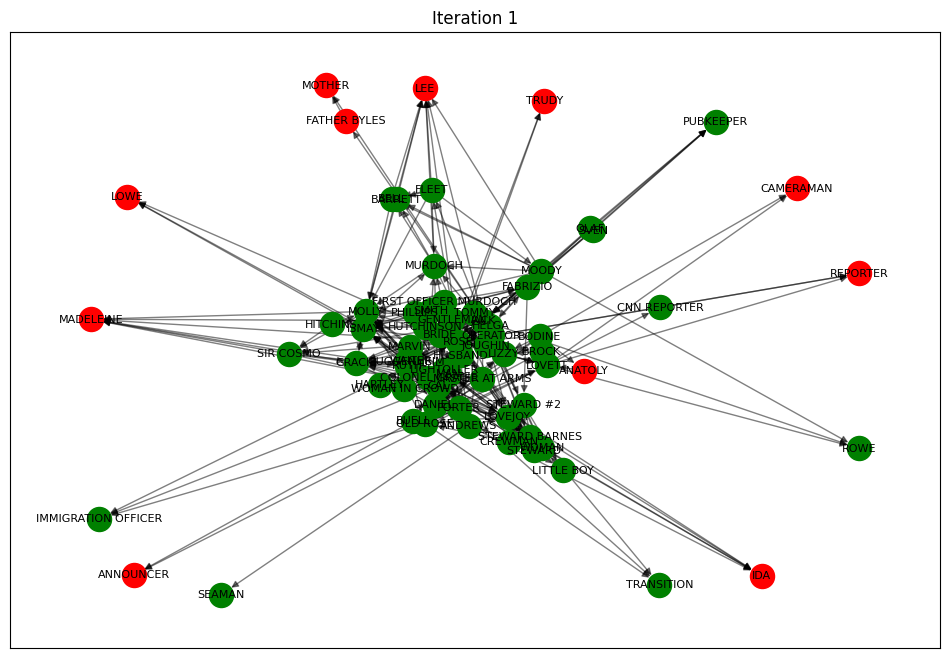

In [27]:
# Randomly select a few nodes to start as adopted
random_initial_nodes = random.sample(G.nodes(), 5)  # Adjust the number as needed

# Set different s and q values for this scenario
s = 0.03
q = 0.15

initialize_node_states(G, random_initial_nodes)
adoption_history = bass_contagion_model(G, s, q, num_iterations)

# Visualize only the last iteration
visualize_evolution(G, [adoption_history[-1]])


### Scenario 3: Varying s and q for Widespread Adoption

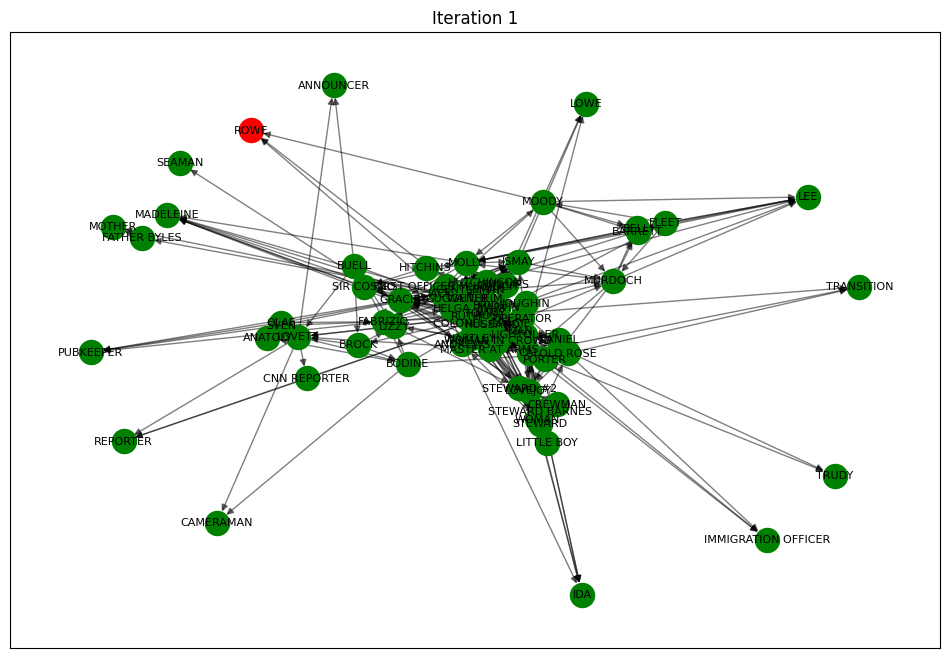

In [28]:
# Use specific or random initialization as per your requirement

# Set higher s and q values to simulate widespread adoption
s = 0.2
q = 0.3

initialize_node_states(G, ['Rose', 'Jack'])  # or use random_initial_nodes
adoption_history = bass_contagion_model(G, s, q, num_iterations)

# Visualize only the last iteration
visualize_evolution(G, [adoption_history[-1]])
